# Taller 1 
Carolina Rincon Paez

1. Descargue las series de tiempo de precios (ajustados) mensuales para el periodo Ene-
2010 a Dic-2021 de las siguientes 4 acciones: MCD, GE, IBM, T. Con esta información:

In [ ]:
# Se importan las librerías
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Descarga datos del mercado
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
# Precios históricos para los activos seleccionados
activos = ["MCD", "GE", "IBM", "T"]
precios = yf.download(activos,start="2010-01-01",end="2021-12-31", interval="1Mo").dropna()
precios = precios.loc[:,"Adj Close"]
precios#.plot()

[*********************100%***********************]  4 of 4 completed


,GE,IBM,MCD,T
Date,,,,
2010-01-01,91.124496,76.034470,43.710953,7.295422
2010-02-01,91.011169,78.997833,44.705196,7.279534
2010-03-01,103.782242,80.031349,47.111687,7.581747
2010-04-01,107.545784,80.499344,49.844330,7.646299
2010-05-01,93.232941,78.165527,47.217609,7.283844
...,...,...,...,...
2021-08-01,105.016121,126.196465,232.276596,19.121510
2021-09-01,102.645004,126.366852,237.139893,18.835596
2021-10-01,104.559372,113.787476,241.506790,17.615221


a. Calcule los retornos logarítmicos.

In [ ]:
retornos=np.log(precios/precios.shift()).dropna()
retornos

,GE,IBM,MCD,T
Date,,,,
2010-02-01,-0.001244,0.038234,0.022491,-0.002180
2010-03-01,0.131313,0.012998,0.052431,0.040677
2010-04-01,0.035622,0.005831,0.056384,0.008478
2010-05-01,-0.142816,-0.029420,-0.054138,-0.048563
2010-06-01,-0.125612,-0.009200,-0.006700,-0.004537
...,...,...,...,...
2021-08-01,0.017320,-0.004408,-0.021868,0.001370
2021-09-01,-0.022837,0.001349,0.020721,-0.015065
2021-10-01,0.018479,-0.104857,0.018247,-0.066985


In [ ]:
rGE = retornos['GE']
rIBM = retornos['IBM']
rMCD = retornos['MCD']
rT = retornos['T']

b. Calcule las estadísticas descriptivas (media, mediana, desv. estándar, curtosis, simetría) para cada uno de ellos. Presente los estadísticos en una tabla para todos los activos.

In [ ]:
#Descripcion Estadistica de los datos
datos = pd.DataFrame()
#media
media = retornos.mean()
#meadiana 
mediana = retornos.median()
#desviación estandar
desviacion_estandar = retornos.std()
#curtosis
curtosis = retornos.kurt()
#simetria => o tamaño de cola
simetria = retornos.skew()

datos["mean"]=media
datos["median"]=mediana
datos["desviacion_estandar"]=desviacion_estandar
datos["curtosis"]=curtosis
datos["simetria"]=simetria
datos

,mean,median,desviacion_estandar,curtosis,simetria
GE,0.000231,-0.001929,0.086937,3.040759,-0.088296
IBM,0.003689,0.002619,0.060536,2.653584,-0.564634
MCD,0.012605,0.011742,0.042488,1.596986,-0.410193
T,0.006158,0.006484,0.048299,1.549797,-0.707906


c. Presente en un Data Frame los retornos esperados y las volatilidades anualizadas

In [ ]:
#media y desviacion 
mean_GE1, sigma_1GE = retornos["GE"].mean(),retornos['GE'].std() 
mean_GE1, sigma_1GE

(0.0002313933094903802, 0.08693658714896975)

In [ ]:
mean_GE=mean_GE1*12
mean_GE

0.002776719713884562

In [ ]:
sigma_GE=sigma_1GE*np.sqrt(12)
sigma_GE

0.30115717195731023

In [ ]:
#Retornos Esperados y Volatilidades Anualizadas
mean_IBM1, sigma_IBM1=retornos['IBM'].mean(),retornos["IBM"].std()
mean_IBM1,sigma_IBM1
mean_IBM = mean_IBM1*12
mean_IBM
sigma_IBM = sigma_IBM1*np.sqrt(12)
sigma_IBM

0.2097033993964569

In [ ]:
#Retornos Esperados y Volatilidades Anualizadas
mean,sigma=retornos['MCD'].mean(),retornos["MCD"].std()
mean,sigma
mean_MCD = mean*12
mean_MCD
sigma_MCD = sigma*np.sqrt(12)
sigma_MCD

0.1471833539901103

In [ ]:
#Retornos Esperados y Volatilidades Anualizadas
mean,sigma=retornos['T'].mean(),retornos["T"].std()
mean,sigma
mean_T= mean*12
sigma_T=sigma*np.sqrt(12)

In [ ]:
df= pd.DataFrame({
                  'GE': (mean_GE, sigma_GE),
                  'IBM': (mean_IBM, sigma_IBM),
                  'MCD': (mean_MCD, sigma_MCD),
                  'T': (mean_T, sigma_T)}, index=["mean","sigma"])

df

,GE,IBM,MCD,T
mean,0.002777,0.044271,0.151265,0.073894
sigma,0.301157,0.209703,0.147183,0.167311


d. Calcule la matriz de correlaciones de Pearson y de Sperman

In [ ]:
#Correlaciones de Spearman
retornos.corr(method="spearman")

,GE,IBM,MCD,T
GE,1.000000,0.343396,0.091615,0.312855
IBM,0.343396,1.000000,0.260223,0.358745
MCD,0.091615,0.260223,1.000000,0.299497
T,0.312855,0.358745,0.299497,1.000000


In [ ]:
#Correlaciones de Pearson
retornos.corr()

,GE,IBM,MCD,T
GE,1.000000,0.363578,0.151317,0.346994
IBM,0.363578,1.000000,0.322563,0.412458
MCD,0.151317,0.322563,1.000000,0.338351
T,0.346994,0.412458,0.338351,1.000000


e. Grafique el histograma de frecuencia de los retornos para dos de las cuatro acciones.

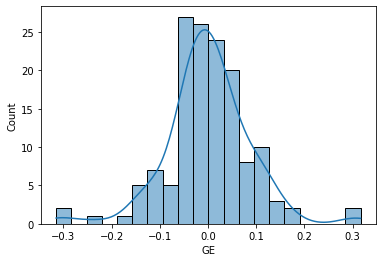

In [ ]:
sbn.histplot(data=retornos, x="GE", kde=True)

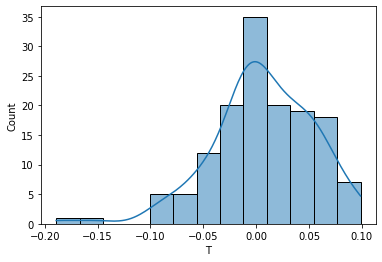

In [ ]:
sbn.histplot(data=retornos, x="T", kde=True)

f. Implemente las pruebas de normalidad de Kolmogorov-Smirnov para todos los activos.
Consolide los resultados en un Data Frame para todos.

In [ ]:
# Prueba de Kolmogorov-Smirnov
GE=stats.kstest(retornos['GE'],"norm")
GE

KstestResult(statistic=0.4159825218444625, pvalue=6.374954725860237e-23)

In [ ]:
# Prueba de Kolmogorov-Smirnov
MCD=stats.kstest(retornos['MCD'],"norm")
MCD

KstestResult(statistic=0.4543297711296272, pvalue=1.736416659623002e-27)

In [ ]:
# Prueba de Kolmogorov-Smirnov
IBM=stats.kstest(retornos['IBM'],"norm")
IBM

KstestResult(statistic=0.4372657222198187, pvalue=2.144139226058292e-25)

In [ ]:
# Prueba de Kolmogorov-Smirnov
T=stats.kstest(retornos['T'],"norm")
T

KstestResult(statistic=0.46069945169330995, pvalue=2.7134528622805504e-28)

In [ ]:
datos1 = pd.DataFrame({'GE':(GE),
                       'MCD':(MCD),
                       'IBM':(IBM),
                       'T':(T)}, index=["statistic","pvalue"])
datos1


,GE,MCD,IBM,T
statistic,4.159825e-01,4.543298e-01,4.372657e-01,4.606995e-01
pvalue,6.374955e-23,1.736417e-27,2.144139e-25,2.713453e-28


2. Con la misma información del punto 1:

a. Calcule la volatilidad mensual y anualizada de las series de retornos usando las medidas
de: i) desviación estándar, ii) Parkinson, iii) Garman-Klass y, iv) volatilidad ponderada
exponencial (EWMA) con una lambda de 0.94. Presente los resultados en un Data Frame

In [ ]:
# Precios históricos para los activos seleccionados
activos = ["MCD", "GE", "IBM", "T"]
precios = yf.download(activos,start="2010-01-01",end="2021-12-31", interval="1Mo").dropna()
precios = precios.loc[:,"Adj Close"]


[*********************100%***********************]  4 of 4 completed


In [ ]:
retornos=np.log(precios/precios.shift()).dropna()
retornos

,GE,IBM,MCD,T
Date,,,,
2010-02-01,-0.001245,0.038233,0.022490,-0.002180
2010-03-01,0.131313,0.012998,0.052432,0.040677
2010-04-01,0.035622,0.005831,0.056384,0.008478
2010-05-01,-0.142815,-0.029421,-0.054138,-0.048563
2010-06-01,-0.125612,-0.009200,-0.006701,-0.004537
...,...,...,...,...
2021-08-01,0.017320,-0.004408,-0.021868,0.001370
2021-09-01,-0.022837,0.001349,0.020721,-0.015065
2021-10-01,0.018479,-0.104857,0.018247,-0.066985


## **i) Desviación Estándar**

In [ ]:
#medida convencional de volatilidad (Mensual)
sigma_d = retornos.std()
sigma_d 


GE     0.086937
IBM    0.060536
MCD    0.042488
T      0.048299
dtype: float64

In [ ]:
#medida convencional de volatilidad (Anualizada)
sigma_h = sigma_d*np.sqrt(12)
sigma_h

GE     0.301157
IBM    0.209703
MCD    0.147183
T      0.167311
dtype: float64

# **ii) Parkinson**

In [ ]:
activo = ["GE","T","IBM","MCD"]
precios = yf.download(activo,start="2010-01-01",end="2021-12-31") 
precios_adj = precios.loc[:,"Adj Close"] #precios de cierre ajustados

[*********************100%***********************]  4 of 4 completed


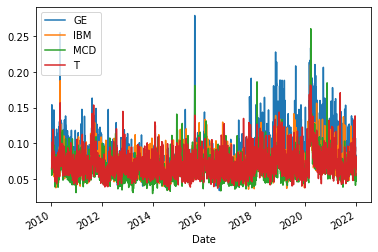

In [ ]:
lnHL = np.log(precios["High"]/precios["Low"]).dropna() 
sigmaPark_d = ((1/(4*np.log(2)))*lnHL-(retornos.mean())**2)**0.5 
sigmaPark_d.plot()

In [ ]:
from numpy.ma.core import sqrt
#anualizamos sigma o medidas cuadraticas como la volatilidad 
sigma_d*np.sqrt(12)

GE     0.301157
IBM    0.209703
MCD    0.147183
T      0.167311
dtype: float64

In [ ]:
# Volatilidad anualizada de Parkinson
#calcula una unica medida de volatilidad. anualiza la media
sigmaPark = sigmaPark_d.mean()*np.sqrt(12)
sigmaPark

GE     0.294920
IBM    0.247268
MCD    0.229442
T      0.243656
dtype: float64

# **iii) Garman-Klass**

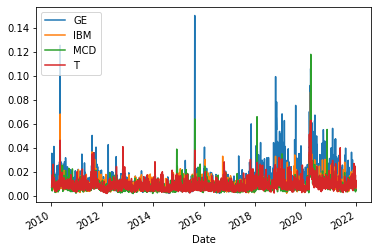

In [ ]:
lnHL = np.log(precios["High"]/precios["Low"]).dropna()
lnCO = np.log(precios["Close"]/precios["Open"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_d.plot()

In [ ]:
# Volatilidad anulizada de Garman-Klass
sigmaGK=sigmaGK_d.mean()*np.sqrt(12)
sigmaGK

GE     0.047108
IBM    0.031917
MCD    0.028815
T      0.031326
dtype: float64

# **iv) Volatilidad Ponderada Exponencial (EWMA)**

In [ ]:
m = len(retornos)
m 

143

In [ ]:
b = np.arange(m-1,-1,-1)
b

array([142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131, 130,
       129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117,
       116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104,
       103, 102, 101, 100,  99,  98,  97,  96,  95,  94,  93,  92,  91,
        90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,  78,
        77,  76,  75,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,
        64,  63,  62,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,
        51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,
        38,  37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,
        25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1,   0])

In [ ]:
l = np.repeat(0.94,m)
l

array([0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94])

In [ ]:
# Definir la función
def EWMAvol(retornos,Lambda):
  m = len(retornos) #1 entrada. cuantos resagos vamos a tener
  b = np.arange(m-1,-1,-1) # secuencia decreciente. 2 entrada: lambda. pomdrados (b) secuencia decreciente
  l = np.repeat(Lambda,m) #secuencia de lambdas

  varewma = ((np.power(retornos,2)*(np.power(l,b))).sum())*(1-Lambda) #serie completa de volatilidades. calcula promedio
  EWMAvol = np.sqrt(varewma) #saca raiz cuadrda para obtener volatilidad. varianza mensual 
  return(EWMAvol)

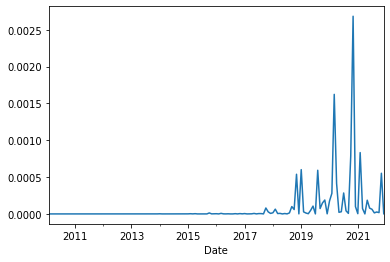

In [ ]:
#mensual por cada acccion 
varewma_GE = ((np.power(retornos["GE"],2)*(np.power(l,b))))*(1-0.94)
varewma_GE.plot()

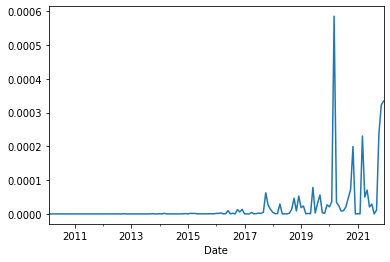

In [ ]:
varewma_T = ((np.power(retornos["T"],2)*(np.power(l,b))))*(1-0.94)
varewma_T.plot()

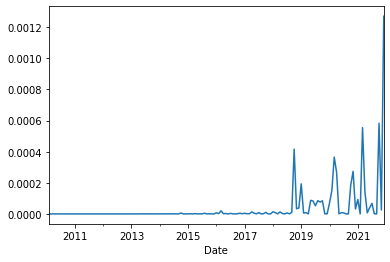

In [ ]:
varewma_IBM = ((np.power(retornos["IBM"],2)*(np.power(l,b))))*(1-0.94)
varewma_IBM.plot()

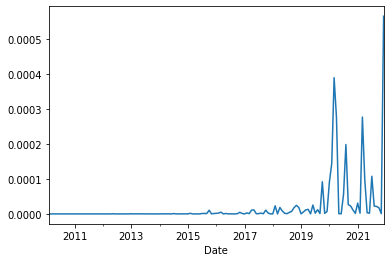

In [ ]:
varewma_MCD = ((np.power(retornos["MCD"],2)*(np.power(l,b))))*(1-0.94)
varewma_MCD.plot()

In [ ]:
Lambda = 0.94
#volatilidad anualizada EWMA
sigmaewma_GE = EWMAvol(rGE,Lambda)*np.sqrt(12)
sigmaewma_GE

0.3650606545260416

In [ ]:
Lambda = 0.94
#volatilidad anualizada EWMA
sigmaewma_T = EWMAvol(rT,Lambda)*np.sqrt(12)
sigmaewma_T

0.18827757956706864

In [ ]:
Lambda = 0.94
#volatilidad anualizada EWMA
sigmaewma_IMB = EWMAvol(rIBM,Lambda)*np.sqrt(12)
sigmaewma_IMB


0.25637083380817166

In [ ]:
Lambda = 0.94
#volatilidad anualizada EWMA
sigmaewma_MCD = EWMAvol(rMCD,Lambda)*np.sqrt(12)
sigmaewma_MCD

0.18180682109895777

In [ ]:
#anualizadas
df2 = pd.DataFrame({'GE':(sigmaewma_GE,sigmaGK,sigmaPark,sigma_h),
                    'IBM':(sigmaewma_IMB,sigmaGK,sigmaPark,sigma_h),
                    'MCD':(sigmaewma_MCD,sigmaGK,sigmaPark,sigma_h),
                    'T':(sigmaewma_T,sigmaGK,sigmaPark,sigma_h)}, index=["EWMA","GK","SigmanPark","Desviacion E."])
df2

,GE,IBM,MCD,T
EWMA,0.365061,0.256371,0.181807,0.188278
GK,GE 0.047108 IBM 0.031917 MCD 0.02881...,GE 0.047108 IBM 0.031917 MCD 0.02881...,GE 0.047108 IBM 0.031917 MCD 0.02881...,GE 0.047108 IBM 0.031917 MCD 0.02881...
SigmanPark,GE 0.294920 IBM 0.247268 MCD 0.22944...,0.247268,GE 0.294920 IBM 0.247268 MCD 0.22944...,GE 0.294920 IBM 0.247268 MCD 0.22944...
Desviacion E.,GE 0.301157 IBM 0.209703 MCD 0.14718...,GE 0.301157 IBM 0.209703 MCD 0.14718...,GE 0.301157 IBM 0.209703 MCD 0.14718...,GE 0.301157 IBM 0.209703 MCD 0.14718...


b. Para un solo activo de su elección, presente las gráficas para las últimas tres medidas
de volatilidad.

In [ ]:
activo = ["T"]
precios = yf.download(activo,start="2010-01-01",end="2021-12-31", interval="1Mo").dropna() 


[*********************100%***********************]  1 of 1 completed


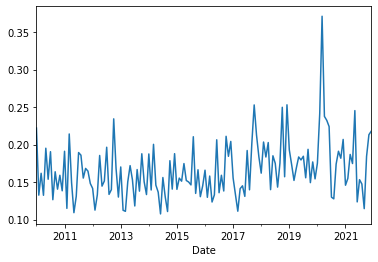

In [ ]:
#parkinson
lnHL = np.log(precios["High"]/precios["Low"]).dropna() #calcula seudoretorno
sigmaPark_S = ((1/(4*np.log(2)))*lnHL-(rT.mean())**2)**0.5
sigmaPark_S.plot()

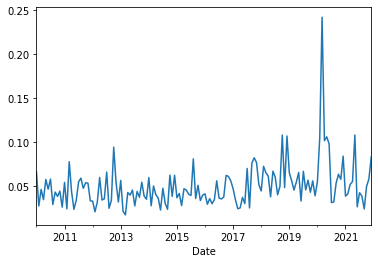

In [ ]:
#Garman-klass
lnHL = np.log(precios["High"]/precios["Low"]).dropna() #calculo de 1 seudo retorno
lnCO = np.log(precios["Close"]/precios["Open"]).dropna() #calculo de 2 seudo retorno
sigmaGK_y = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_y.plot()

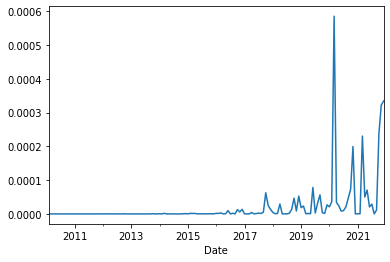

In [ ]:
#EWMA
varewma_T = ((np.power(retornos["T"],2)*(np.power(l,b))))*(1-0.94)
varewma_T.plot()